In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

YEAR = 2010
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = pd.read_excel('WB GDP 2010.xls')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = pd.read_excel('WB LE 2010.xls')
lifeReset.head()

,Country Name,Year,SP.DYN.LE00.IN
0,Aruba,2010,75.017
1,Afghanistan,2010,61.028
2,Angola,2010,55.350
3,Albania,2010,76.562
4,Andorra,2010,NaN


In [2]:
gdpCountries = gdpReset[0:].dropna()
lifeCountries = lifeReset[0:].dropna()

In [3]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

,Country Name,Year,NY.GDP.MKTP.CD,GDP (£m)
0,Aruba,2010,2.390503e+09,1528
1,Africa Eastern and Southern,2010,8.036886e+11,513615
2,Afghanistan,2010,1.585657e+10,10133
3,Africa Western and Central,2010,5.802173e+11,370801
4,Angola,2010,8.379950e+10,53554


In [4]:
COUNTRY = 'Country Name'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,Country Name,GDP (£m)
0,Aruba,1528
1,Africa Eastern and Southern,513615
2,Afghanistan,10133
3,Africa Western and Central,370801
4,Angola,53554


In [5]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = lifeCountries[headings]
lifeClean.head()

,Country Name,Life expectancy (years)
0,Aruba,75
1,Afghanistan,61
2,Angola,55
3,Albania,77
5,Arab World,70


In [10]:
import pandas as pd 

merged_df = pd.merge(gdpClean, lifeClean, how='inner',on=['Country Name']) 

In [13]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLife.head()

,Country Name,GDP (£m),Life expectancy (years)
0,Aruba,1528,75
1,Afghanistan,10133,61
2,Angola,53554,55
3,Albania,7622,77
4,Arab World,1349162,70


In [14]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.30110985291795933
It is statistically significant.


<AxesSubplot:xlabel='GDP (£m)', ylabel='Life expectancy (years)'>

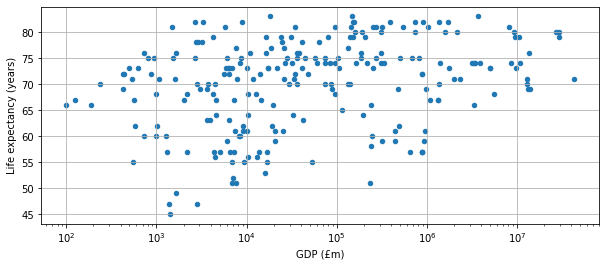

In [15]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

In [16]:
# the 10 countries with lowest GDP
gdpVsLife.sort_values(GDP).head(10)

,Country Name,GDP (£m),Life expectancy (years)
114,Kiribati,100,66
197,Sao Tome and Principe,126,67
72,"Micronesia, Fed. Sts.",190,66
214,Tonga,234,70
233,Samoa,424,72
231,Vanuatu,429,69
227,St. Vincent and the Grenadines,435,72
82,Grenada,493,73
189,Solomon Islands,541,71
79,Guinea-Bissau,543,55


In [17]:
# the 10 countries with lowest life expectancy
gdpVsLife.sort_values(LIFE).head(10)

,Country Name,GDP (£m),Life expectancy (years)
130,Lesotho,1428,45
202,Eswatini,2837,47
30,Central African Republic,1369,47
190,Sierra Leone,1648,49
238,Zimbabwe,7695,51
204,Chad,6818,51
158,Nigeria,230997,51
150,Mozambique,7097,52
36,Cote d'Ivoire,15919,53
2,Angola,53554,55
